In [4]:
import sqlite3
import matplotlib.pyplot as plt

# 1. ვუკავშირდებით მონაცემთა ბაზას
conn = sqlite3.connect('oscar winners.db')
conn.row_factory = sqlite3.Row
c = conn.cursor()

In [5]:
# ვთვლით კაცების და ქალების ოსკარის გამარჯვებებს
def count_gender_win(gender, win_y):
    return c.execute('SELECT count(*) FROM oscar_winners WHERE "Sex" = ? AND "Year" = ?', (gender, win_y)).fetchone()[0]

gender_year = int(input("მიუთითეთ წელი სქესობრივი განაწილების სანახავად: "))
c_female_win = count_gender_win('female', gender_year)
c_male_win = count_gender_win('male', gender_year)

<class 'ValueError'>: invalid literal for int() with base 10: ''

ამატებს ახალ გამარჯვებულს ბაზაში მომხმარებლის მიერ შეყვანილი ინფორმაციით.

In [7]:
name = input('შეიყვანეთ გამარჯვებულის სახელი: ')
year = int(input("შეიყვანეთ წელი: "))
sex = input('შეიყვანეთ სქესი (male/female): ')
age = int(input('შეიყვანეთ ასაკი გამარჯვების დროს: '))


c.execute('''
    INSERT INTO oscar_winners ("""Name""", """Year""", """Sex""", """Age""")
    VALUES (?, ?, ?, ?)''', (name, year, sex, age))
conn.commit()



<class 'ValueError'>: invalid literal for int() with base 10: ''

In [ ]:
old_name = input("შეიყვანეთ გამარჯვებულის ძველი სახელი: ")
new_name = input("შეიყვანეთ ახალი სახელი: ")
c.execute('''
    UPDATE oscar_winners
    SET """Name""" = ?
    WHERE "Name" = ?
''', (new_name, old_name))
conn.commit()


მომხმარებელი ანახლებს გამარჯვებულის სახელს

In [ ]:
year_to_delete = int(input("შეიყვანეთ წელი, რომლის მიხედვით გსურთ ჩანაწერის წაშლა: "))
c.execute('''
    DELETE FROM oscar_winners
    WHERE "Year" = ?
''', (year_to_delete,))
conn.commit()

მომხმარებელს შეყავს წელი რომელიც სურს რომ ჩანაწერიდან წაიშალოს

In [ ]:
import matplotlib.pyplot as plt

labels = 'female', 'male'
sizes = [c_female_win, c_male_win]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.show()

ქალებისა და კაცების ოსკარები მითითებულ წელს

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.transforms as mtransforms

fig, ax = plt.subplots()
ax.plot(range(10))
ax.set_yticks([2, 5, 7], labels=[20, 30, 40, 50, 60, 70])


def on_draw(event):
    bboxes = []
    for label in ax.get_yticklabels():
        # Bounding box in pixels
        bbox_px = label.get_window_extent()
        # Transform to relative figure coordinates. This is the inverse of
        # transFigure.
        bbox_fig = bbox_px.transformed(fig.transFigure.inverted())
        bboxes.append(bbox_fig)
    # the bbox that bounds all the bboxes, again in relative figure coords
    bbox = mtransforms.Bbox.union(bboxes)
    if fig.subplotpars.left < bbox.width:
        # Move the subplot left edge more to the right
        fig.subplots_adjust(left=1.1*bbox.width)  # pad a little
        fig.canvas.draw()


fig.canvas.mpl_connect('draw_event', on_draw)

plt.show()


ასაკების განაწილება

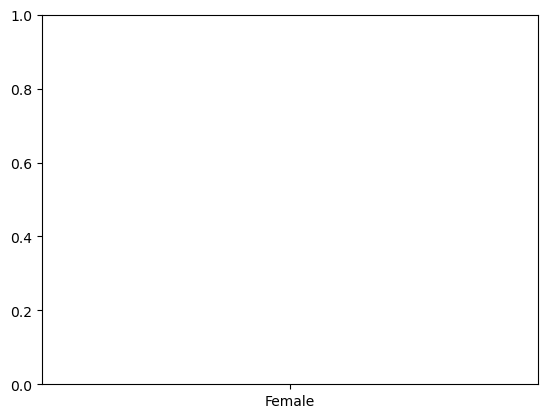

<class 'ValueError'>: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (4,).

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

genders = ['Female', 'Male']
counts = [20, 30, 40, 50, 60, 70]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red', 'tab:blue']

ax.bar(genders, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('AGE')
ax.set_title('Gender')


plt.show()


გამარჯვებულების რაოდენობა წლების მიხედვით